# Project: Wrangle and Analyze Data

In [1]:
# load libraries
import datetime as dt
import warnings
import json
import numpy as np
import pandas as pd
import requests
import tweepy
import os

In [2]:
# put warnings out of sight
warnings.filterwarnings('ignore')

## Gather

On this section, we will load and create dataframes from local file provide by Udacity and download programmatically any other needed file for our analysis.

### Twitter Archive - Local File

In [3]:
# load twitter archive and test
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Prediction - Programmatically 

In [4]:
# download image-prediction file 
# url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# response = requests.get(url)

# with open(url.split('/')[-1], mode = 'wb') as file:
#    file.write(response.content)
    


In [5]:
# load image_prediction data set
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Twitter API

In [6]:
# Personal API keys, secrets, and tokens 
# consumer_key = #
# consumer_secret = #
# access_token = #
# access_secret = #

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [7]:
# In a loop, access each tweet_id using the API and write each line to the file.

# with open('tweet_json.txt', mode = 'w') as file:
#    for tweet_id in tweet_ids:
#        try:
#            status = api.get_status(tweet_id)
#            json_str = json.dumps(status._json)
#        except:
#             # Then must have been deleted
#                continue
#        file.write(json_str + '\n')

In [8]:
# Save only certain tweet elements in dataframe. 
# create dataframe from json file.
with open('tweet_json.txt') as json_file:
    tweet_json = pd.DataFrame(columns = ['tweet_id', 
                                        'favorites', 
                                        'retweets'])
    for line in json_file:
        tweet = json.loads(line)
        tweet_json = tweet_json.append({
            'tweet_id': tweet['id'],
            'favorites': tweet['favorite_count'],
            'retweets': tweet['retweet_count']
        }, ignore_index=True)

In [9]:
tweet_json.head()

,tweet_id,favorites,retweets
0,892420643555336193,38128,8340
1,892177421306343426,32704,6163
2,891815181378084864,24623,4079
3,891689557279858688,41476,8485
4,891327558926688256,39639,9171


## Assess

On this section, we will check the quality and tidiness of our datasets. Any quality or tidiness issues will be reported and cleaned on the next section.

### Check Datasets

In [10]:
# check twitter_archive dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# check image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# check tweet_json
tweet_json

,tweet_id,favorites,retweets
0,892420643555336193,38128,8340
1,892177421306343426,32704,6163
2,891815181378084864,24623,4079
3,891689557279858688,41476,8485
4,891327558926688256,39639,9171
5,891087950875897856,19904,3056
6,890971913173991426,11639,2027
7,890729181411237888,64330,18509
8,890609185150312448,27351,4194
9,890240255349198849,31384,7241


In [13]:
# information about a twitter_archive including the index dtype and column dtypes, non-null values and memory usage.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# information about a image_predictions including the index dtype and column dtypes, non-null values and memory usage.
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# information about a tweet_json including the index dtype and column dtypes, non-null values and memory usage.
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 3 columns):
tweet_id     888 non-null object
favorites    888 non-null object
retweets     888 non-null object
dtypes: object(3)
memory usage: 20.9+ KB


In [16]:
# checking for duplicated columns names
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [17]:
# descriptive statistics for twitter_archive that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# descriptive statistics for image_predictions that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# descriptive statistics for tweet_json that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
tweet_json.describe()

,tweet_id,favorites,retweets
count,888,888,888
unique,888,722,759
top,785533386513321988,0,2103
freq,1,156,4


In [20]:
# counts of name unique values
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Daisy         7
Bailey        7
Buddy         7
Toby          7
Jax           6
Rusty         6
Koda          6
Leo           6
Milo          6
Oscar         6
Jack          6
Scout         6
Stanley       6
Bella         6
Dave          6
Alfie         5
           ... 
Obi           1
Bobb          1
Mimosa        1
Maks          1
Laika         1
Ashleigh      1
Livvie        1
Florence      1
Todo          1
Chuq          1
Cupid         1
Remy          1
Kellogg       1
Barclay       1
Brooks        1
Lassie        1
Ambrose       1
Callie        1
Harvey        1
Augie         1
Emanuel       1
Sunshine      1
Cecil         1
Bobble        1
Chaz          1
Billl         1
Walker        1
Andru         1
Bloo          1
Opie          1
Name: name, Length: 957,

In [21]:
# View number of entries for each source
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
# value_counts for p1
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [23]:
# value_counts for p2
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [24]:
# value counts for p3
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [25]:
# checking for duplicates
twitter_archive['tweet_id'].duplicated().sum(), image_predictions['tweet_id'].duplicated().sum(), tweet_json['tweet_id'].duplicated().sum()

(0, 0, 0)

In [26]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


### Quality Summary

> twitter_archive:
- There are no accurate names in name columns. NaN values represented by the word 'None'. 'a' for some names.
- timestamp column have the incorrect datatype.
- drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. 
- missing some expanded_urls. Remove columns with missing expanded_urls.
- source a bit defficult to read. Make it readable.

> image_predictions:
- inconsistent letter cases (p1, p2, p3 sometimes first letter is capital).
- p1, p2, p3 better represented as categorical.
- p1_dog, p2_dog, p3_dog better represented as numerical.
- missing data (2075 out of 2356)

> tweet_json:
- columns are better if the are int64
- missing data (2347 out of 2356)


### Tidiness Summary

- Dog type variable in four columns: doggo, floofer, pupper, puppo.
- Consolidate 'tweet_info' and 'image_predictions' to 'twitter_archive' into one dataset.

## Clean

##### Define

*Inaccurate dog names in the name column. NaN values represented by the word 'None'. 'a' for some names.*

##### Code

In [27]:
# make copies of the daatset
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [28]:
#this is the same code as above, only tinkering it a bit to filter out rows with 'named' in the text and 'None' in the 
#name column
index_list = twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('named') & 
                                              twitter_archive_clean.name.str.islower()].index.tolist()

all_indices = twitter_archive_clean.index.tolist()

for e in all_indices:
    if e in index_list:
        for ele in list(range(len(index_list))):
            text_list = (twitter_archive_clean.loc[(twitter_archive_clean.name == 'None') & 
                                                 (twitter_archive_clean.text.str.contains('named'))].text).tolist()
            num = text_list[ele].find('named')
            x = twitter_archive_clean.loc[twitter_archive_clean.index == e, 'text'].str[num+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                          expand = True)[0]
            twitter_archive_clean.loc[twitter_archive_clean.index == e, 'name'] = x
            break

In [29]:
# replacing the remaining 'None's in the name column by NaN values
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

##### Test

In [30]:
twitter_archive_clean.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Define

*Convert timestamp and retweeted_status_timestamp to data type datetime*

##### Code

In [31]:
# timestamp and retweeted_status_timestamp to data type datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

##### Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

##### Define

*Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*

##### Code

In [33]:
# drop columns
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

##### Test

In [34]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Define

*Dog breed variable in four columns: doggo, floofer, pupper, puppo*

##### Code

In [35]:
# create the column dog_breed
twitter_archive_clean['dog_type'] = twitter_archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)


In [36]:
# drop the columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [37]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Define

*missing some expanded_urls. Remove columns with missing expanded_urls.*

##### Code

In [38]:
# remove columns with missing expanded_urls
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

##### Test

In [39]:
# check expanded_urls column
sum(twitter_archive_clean['expanded_urls'].isnull())

0

##### Define

*source a bit defficult to read. Make it readable.*

##### Code

In [40]:
# the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
d = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'

In [41]:
#using the variables created above in the replace function 
twitter_archive_clean.source = twitter_archive_clean.source.replace(a, 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.replace(b, 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.replace(c, 'TweetDeck')
twitter_archive_clean.source = twitter_archive_clean.source.replace(d, 'Make a Scene')

##### Test

In [42]:
# check value counts
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2163
Make a Scene            91
Twitter Web Client      32
TweetDeck               11
Name: source, dtype: int64

##### Define

*inconsistent letter cases (p1, p2, p3 sometimes first letter is capital).*

##### Code

In [43]:
#capitalizing by using the str.title function
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

##### Test

In [44]:
image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


##### Define

*p1, p2, p3 better represented as categorical.*

##### Code

In [45]:
# change columns type
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')
image_predictions_clean.p2 = image_predictions_clean.p2.astype('category')
image_predictions_clean.p3 = image_predictions_clean.p3.astype('category')

In [46]:
# change columns type
image_predictions_clean.p1_dog = image_predictions_clean.p1_dog.astype(np.float32)
image_predictions_clean.p2_dog = image_predictions_clean.p2_dog.astype(np.float32)
image_predictions_clean.p3_dog = image_predictions_clean.p3_dog.astype(np.float32)

##### Test

In [47]:
# check changes
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null float32
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null float32
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null float32
dtypes: category(3), float32(3), float64(3), int64(2), object(1)
memory usage: 193.1+ KB


##### Define

*tweet_json columns are better if the are int64.*

##### Code

In [48]:
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(np.int64)
tweet_json_clean.favorites = tweet_json_clean.favorites.astype(np.int64)
tweet_json_clean.retweets = tweet_json_clean.retweets.astype(np.int64)

##### Test

In [49]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 3 columns):
tweet_id     888 non-null int64
favorites    888 non-null int64
retweets     888 non-null int64
dtypes: int64(3)
memory usage: 20.9 KB


##### Combining all cleaned dataset into one named twitter_archive_master

In [50]:
# merge dataset on those that have a tweet_id
twitter_archive_master = pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id', how='inner')

In [51]:
twitter_archive_master.shape

(856, 11)

In [52]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 855
Data columns (total 11 columns):
tweet_id              856 non-null int64
timestamp             856 non-null datetime64[ns]
source                856 non-null object
text                  856 non-null object
expanded_urls         856 non-null object
rating_numerator      856 non-null int64
rating_denominator    856 non-null int64
name                  658 non-null object
dog_type              104 non-null object
favorites             856 non-null int64
retweets              856 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 80.2+ KB


In [53]:
# combined dataset to csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Insights about data

In [54]:
# import visialization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [55]:
# check first rows of dataset
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38128,8340
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32704,6163
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24623,4079
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41476,8485
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39639,9171


## Tweets Source Distribution

Text(0.5, 1.0, 'Source Distribution')

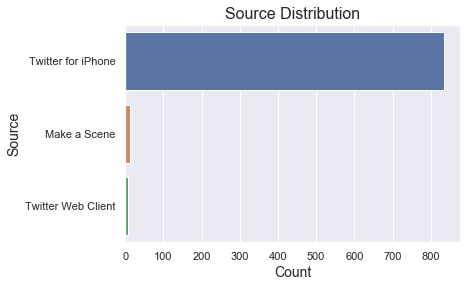

In [56]:
# Source Distribution plot
sorted_source = twitter_archive_master['source'].value_counts().index
sns.countplot(data = twitter_archive_master, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Source', fontsize = 14)
plt.title('Source Distribution',fontsize = 16)

In [61]:
# value_counts()
twitter_archive_master['source'].value_counts()

Twitter for iPhone    835
Make a Scene           13
Twitter Web Client      8
Name: source, dtype: int64

##### In the plot above we have the tweet source distribution, it is noticible that main source of the tweets come from smart devices in this case iPhones. Twitter Mobile App is desire user application and Tweet Web Client is not.

## Correlation

##### After visually inspecting our new dataset, I think that there is a positive correlation between favotires and retweets.

In [63]:
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets
tweet_id,1.000000,0.111934,0.001525,0.397126,0.133258
rating_numerator,0.111934,1.000000,0.579589,0.065854,0.056668
rating_denominator,0.001525,0.579589,1.000000,-0.003458,-0.009530
favorites,0.397126,0.065854,-0.003458,1.000000,0.652649
retweets,0.133258,0.056668,-0.009530,0.652649,1.000000


In [57]:
# correlation between favorites and retweets
twitter_archive_master['favorites'].corr(twitter_archive_master['retweets'])

0.6526485958693488

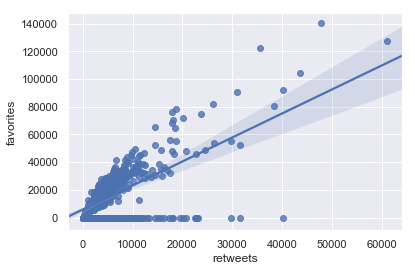

In [58]:
# scatter plot
sns.regplot(x = "retweets", y = "favorites", data = twitter_archive_master)

##### As expected, the plot above show us that there is a positive correlation between favorites and retweets. We can say that the favotires tweet usually gets the most retweets.

## dog_type Distribution

Text(0.5, 1.0, 'dog_type Distribution')

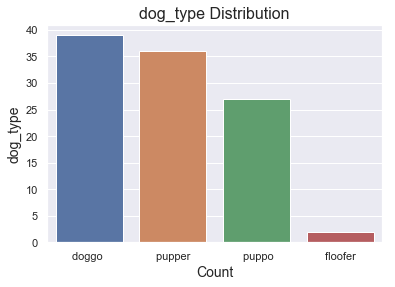

In [59]:
# dog_type Distribution plot
sorted_stage = twitter_archive_master['dog_type'].value_counts().index
sns.countplot(data = twitter_archive_master, x = 'dog_type', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('dog_type', fontsize = 14)
plt.title('dog_type Distribution',fontsize = 16)

In [60]:
# value_counts()
twitter_archive_master['dog_type'].value_counts()

doggo        39
 pupper      36
 puppo       27
 floofer      2
Name: dog_type, dtype: int64

##### The plot above show us the dog_type distribution. We can see that doggo are the most popular dog type followed closelly by pupper and floofer  are not.